In [1]:
import ambulance_game as abg
import numpy as np
import sympy as sym
from sympy.abc import a,b,c,d,e,f,g,h,i,j

# Classic Markov Chain

In [2]:
def get_P0(lambda_2, lambda_1, mu, num_of_servers, threshold):
    ro = (lambda_2 + lambda_1) / (mu * num_of_servers)
    summation_1 = np.sum(
        [
            ((ro * num_of_servers) ** i) / np.math.factorial(i)
            for i in range(num_of_servers)
        ]
    )
    summation_2 = ((num_of_servers * ro) ** num_of_servers) / (
        np.math.factorial(num_of_servers) * (1 - ro)
    )
    P_0 = 1 / (summation_1 + summation_2)
    return P_0


In [3]:
def get_prob(P_0, state, lambda_2, lambda_1, mu, num_of_servers, threshold):
    u = state[0]
    v = state[1]

    ro = (lambda_2 + lambda_1) / (mu * num_of_servers)
    # P_0 = get_P0(lambda_2, lambda_1, mu, num_of_servers, threshold)

    if v < num_of_servers:
        P_i = P_0 * ((ro * num_of_servers) ** v) / np.math.factorial(v)
        return P_i

    # if u != 0:
    #     ro_a = (lambda_2) / (mu * num_of_servers)
    #     P_i_1 = (P_0 * (ro ** v) * (num_of_servers ** num_of_servers) / (np.math.factorial(num_of_servers)))
    #     P_i_2 = (P_0 * (ro_a ** u) * (num_of_servers ** num_of_servers) / (np.math.factorial(num_of_servers)))
    #     return P_i_1 + P_i_2

    P_i = (P_0 * (ro ** v) * (num_of_servers ** num_of_servers) / (np.math.factorial(num_of_servers)))
    return P_i


In [4]:
lambda_2 = 1
lambda_1 = 1
mu = 2

num_of_servers = 3
threshold = 6
system_capacity = threshold - 1
buffer_capacity = 1


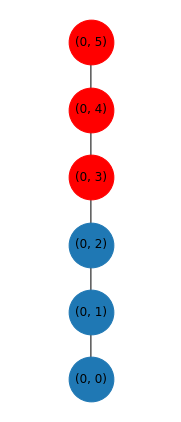

In [5]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers, threshold, system_capacity, buffer_capacity)

In [6]:
all_states = abg.markov.build_states(threshold, system_capacity, buffer_capacity)
Q = abg.markov.get_transition_matrix(
    lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity
)
sol = abg.markov.get_steady_state_algebraically(Q, algebraic_function=np.linalg.solve)
sol



array([0.36486486, 0.36486486, 0.18243243, 0.06081081, 0.02027027,
       0.00675676])

In [7]:
exact_P0 = get_P0(lambda_2, lambda_1, mu, num_of_servers, threshold)
sum([get_prob(exact_P0, state, lambda_2, lambda_1, mu, num_of_servers, threshold) for state in all_states])


0.9966329966329966

In [8]:
sum([get_prob(sol[0], state, lambda_2, lambda_1, mu, num_of_servers, threshold) for state in all_states])


0.9999999999999999

# Using Sympy

In [9]:
lambda_2 = 1
lambda_1 = 1
mu = 2

num_of_servers = 1
threshold = 3
system_capacity = threshold - 1
buffer_capacity = 1

## Numeric

In [10]:
Q_num = abg.markov.get_transition_matrix(lambda_2=lambda_2, lambda_1=lambda_1, mu=mu, num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
Q_num

array([[-2.,  2.,  0.],
       [ 2., -4.,  2.],
       [ 0.,  2., -2.]])

In [11]:
dimension = Q_num.shape[0]
print(dimension)

3


In [12]:
Q_num.transpose()[:-1,:]

array([[-2.,  2.,  0.],
       [ 2., -4.,  2.]])

In [13]:
M_num = np.vstack((Q_num.transpose()[:-1], np.ones(dimension)))
M_num

array([[-2.,  2.,  0.],
       [ 2., -4.,  2.],
       [ 1.,  1.,  1.]])

In [14]:
b_num = np.vstack((np.zeros((dimension - 1, 1)), [1]))
b_num

array([[0.],
       [0.],
       [1.]])

In [15]:
np.linalg.solve(M_num, b_num).transpose()[0]

array([0.33333333, 0.33333333, 0.33333333])

## Symbolic

In [16]:
Q_sym = abg.markov.get_symbolic_transition_matrix(num_of_servers=num_of_servers, 
                                            threshold=threshold, 
                                            system_capacity=system_capacity,
                                            buffer_capacity=buffer_capacity)
Q_sym

Matrix([
[-Lambda,       Lambda,      0],
[     mu, -Lambda - mu, Lambda],
[      0,           mu,    -mu]])

In [17]:
dimension = Q_sym.shape[0]
dimension

3

In [18]:
sym.ones(1, dimension)

Matrix([[1, 1, 1]])

In [19]:
M_sym = sym.Matrix([Q_sym.transpose()[:-1,:], sym.ones(1,dimension)])
M_sym

Matrix([
[-Lambda,           mu,  0],
[ Lambda, -Lambda - mu, mu],
[      1,            1,  1]])

In [20]:
b_sym = sym.Matrix([sym.zeros(dimension - 1, 1), [1]])
b_sym

Matrix([
[0],
[0],
[1]])

In [21]:
system = M_sym.col_insert(5,b_sym)
system

Matrix([
[-Lambda,           mu,  0, 0],
[ Lambda, -Lambda - mu, mu, 0],
[      1,            1,  1, 1]])

In [22]:
# np.linalg.solve(M_sym, b_sym).transpose()[0]
sym.init_printing(use_latex='mathjax')
sym_pi=sym.solve_linear_system_LU(system, [a,b,c,d,e])
sym_pi

⎧                                              ⎛    Λ⋅(Λ + μ)⎞                
⎪                                     (-Λ + μ)⋅⎜Λ + ─────────⎟          (-Λ + 
⎪                                              ⎝     -2⋅Λ - μ⎠                
⎪                                -Λ - ────────────────────────     -Λ - ──────
⎪            Λ⋅(Λ + μ)                      (-Λ + μ)⋅(Λ + μ)                  
⎨        Λ + ─────────                  Λ - ────────────────              Λ - 
⎪             -2⋅Λ - μ                          -2⋅Λ - μ                      
⎪a: - ──────────────────── + 1 - ─────────────────────────────, b: ───────────
⎪         (-Λ + μ)⋅(Λ + μ)                  -2⋅Λ - μ                          
⎪     Λ - ────────────────                                                    
⎩             -2⋅Λ - μ                                                        

   ⎛    Λ⋅(Λ + μ)⎞                         ⎫
μ)⋅⎜Λ + ─────────⎟                         ⎪
   ⎝     -2⋅Λ - μ⎠                      

In [23]:
[sym.simplify(sym_pi[key]) for key in sym_pi.keys()]

⎡       2                             2     ⎤
⎢      μ             Λ⋅μ             Λ      ⎥
⎢─────────────, ─────────────, ─────────────⎥
⎢ 2          2   2          2   2          2⎥
⎣Λ  + Λ⋅μ + μ   Λ  + Λ⋅μ + μ   Λ  + Λ⋅μ + μ ⎦

# Multiple examples

In [24]:
sym.init_printing(use_latex='mathjax')

In [25]:
def get_symbolic_pi(num_of_servers, threshold, system_capacity, buffer_capacity):
    Q_sym = abg.markov.get_symbolic_transition_matrix(num_of_servers=num_of_servers, 
                                            threshold=threshold, 
                                            system_capacity=system_capacity,
                                            buffer_capacity=buffer_capacity)
    dimension =  Q_sym.shape[0]
    if dimension > 7:
        return "Capacity of 6 exceeded"
    M_sym = sym.Matrix([Q_sym.transpose()[:-1,:], sym.ones(1,dimension)])
    b_sym = sym.Matrix([sym.zeros(dimension - 1, 1), [1]])
    system = M_sym.col_insert(dimension,b_sym)
    sol = sym.solve_linear_system_LU(system, [a,b,c,d,e,f,g])
    return sol



# $C=1, T=3, N=2, M=1$

In [112]:
num_of_servers = 1
threshold = 3
system_capacity = 2
buffer_capacity = 1

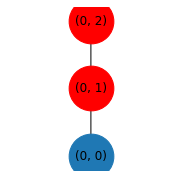

In [113]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers, threshold, system_capacity, buffer_capacity)

In [27]:
sym_pi = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

In [24]:
abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

[(0, 0), (0, 1), (0, 2)]

In [28]:
[sym.simplify(sym_pi[key]) for key in sym_pi.keys()]

⎡       2                             2     ⎤
⎢      μ             Λ⋅μ             Λ      ⎥
⎢─────────────, ─────────────, ─────────────⎥
⎢ 2          2   2          2   2          2⎥
⎣Λ  + Λ⋅μ + μ   Λ  + Λ⋅μ + μ   Λ  + Λ⋅μ + μ ⎦

# $C=1, T=4, N=3, M=1$

In [114]:
num_of_servers = 1
threshold = 4
system_capacity = 3
buffer_capacity = 1

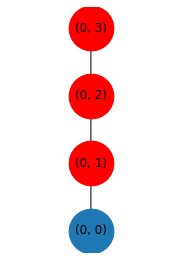

In [115]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers, threshold, system_capacity, buffer_capacity)

In [30]:
sym_pi = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

In [31]:
abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

[(0, 0), (0, 1), (0, 2), (0, 3)]

In [32]:
[sym.simplify(sym_pi[key]) for key in sym_pi.keys()]

⎡           3                       2                    2                    
⎢          μ                     Λ⋅μ                    Λ ⋅μ                  
⎢─────────────────────, ─────────────────────, ─────────────────────, ────────
⎢ 3    2        2    3   3    2        2    3   3    2        2    3   3    2 
⎣Λ  + Λ ⋅μ + Λ⋅μ  + μ   Λ  + Λ ⋅μ + Λ⋅μ  + μ   Λ  + Λ ⋅μ + Λ⋅μ  + μ   Λ  + Λ ⋅

   3         ⎤
  Λ          ⎥
─────────────⎥
       2    3⎥
μ + Λ⋅μ  + μ ⎦

# $C=1, T=1, N=2, Μ=1$

In [116]:
num_of_servers = 1
threshold = 1
system_capacity = 2
buffer_capacity = 1

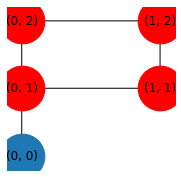

In [117]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers, threshold, system_capacity, buffer_capacity)

In [33]:
abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

[(0, 0), (0, 1), (1, 1), (0, 2), (1, 2)]

In [34]:
sym_pi = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

In [80]:
sym_state_probs = [0 for _ in range(5)]

In [85]:
# (0,0)
sym_state_probs[0] = sym.simplify(1 - sum(sym_state_probs[1:]))
sym_state_probs[0]

                                               3                              
                                              μ ⋅(λ__A + μ)                   
──────────────────────────────────────────────────────────────────────────────
      2              2                2                               2       
Λ⋅λ__A ⋅λ__o + Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 3⋅Λ⋅λ__A⋅λ__o⋅μ + 2⋅Λ⋅λ__A⋅μ  + Λ⋅λ_

                           
                           
───────────────────────────
    2      3         3    4
_o⋅μ  + Λ⋅μ  + λ__A⋅μ  + μ 

In [84]:
# (0,1)
sym_state_probs[1] = sym.simplify(sym_pi[b])
sym_state_probs[1]

                                                2                             
                                             Λ⋅μ ⋅(λ__A + μ)                  
──────────────────────────────────────────────────────────────────────────────
      2              2                2                               2       
Λ⋅λ__A ⋅λ__o + Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 3⋅Λ⋅λ__A⋅λ__o⋅μ + 2⋅Λ⋅λ__A⋅μ  + Λ⋅λ_

                           
                           
───────────────────────────
    2      3         3    4
_o⋅μ  + Λ⋅μ  + λ__A⋅μ  + μ 

In [83]:
# (1,1)
sym_state_probs[2] = sym.simplify(sym_pi[c])
sym_state_probs[2]

                                        Λ⋅λ__A⋅μ⋅(λ__A + λ__o + μ)            
──────────────────────────────────────────────────────────────────────────────
      2              2                2                               2       
Λ⋅λ__A ⋅λ__o + Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 3⋅Λ⋅λ__A⋅λ__o⋅μ + 2⋅Λ⋅λ__A⋅μ  + Λ⋅λ_

                           
───────────────────────────
    2      3         3    4
_o⋅μ  + Λ⋅μ  + λ__A⋅μ  + μ 

In [82]:
# (0,2)
sym_state_probs[3] = sym.simplify(sym_pi[d])
sym_state_probs[3]

                                                        2                     
                                                Λ⋅λ__o⋅μ                      
──────────────────────────────────────────────────────────────────────────────
      2              2                2                               2       
Λ⋅λ__A ⋅λ__o + Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 3⋅Λ⋅λ__A⋅λ__o⋅μ + 2⋅Λ⋅λ__A⋅μ  + Λ⋅λ_

                           
                           
───────────────────────────
    2      3         3    4
_o⋅μ  + Λ⋅μ  + λ__A⋅μ  + μ 

In [81]:
# (1,2)
sym_state_probs[4] = sym.simplify(sym_pi[e])
sym_state_probs[4]

                                     Λ⋅λ__A⋅λ__o⋅(λ__A + λ__o + 2⋅μ)          
──────────────────────────────────────────────────────────────────────────────
      2              2                2                               2       
Λ⋅λ__A ⋅λ__o + Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 3⋅Λ⋅λ__A⋅λ__o⋅μ + 2⋅Λ⋅λ__A⋅μ  + Λ⋅λ_

                           
───────────────────────────
    2      3         3    4
_o⋅μ  + Λ⋅μ  + λ__A⋅μ  + μ 

In [86]:
sym.simplify(sum(sym_state_probs))

1

# $C=2, T=1, N=2, M=1$

In [118]:
num_of_servers = 2
threshold = 1
system_capacity = 2
buffer_capacity = 1

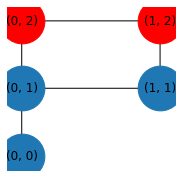

In [119]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers, threshold, system_capacity, buffer_capacity)

In [31]:
abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

[(0, 0), (0, 1), (1, 1), (0, 2), (1, 2)]

In [36]:
sym_pi = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

In [37]:
sym_state_probs = [0 for _ in range(5)]

In [46]:
# (0,0)
sym_state_probs[0] = sym.simplify(1 - sum(sym_state_probs[1:]))
sym_state_probs[0]

                                                    3                         
                                                 2⋅μ ⋅(λ__A + 2⋅μ)            
──────────────────────────────────────────────────────────────────────────────
      2                2                2                               2     
Λ⋅λ__A ⋅λ__o + 2⋅Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 5⋅Λ⋅λ__A⋅λ__o⋅μ + 6⋅Λ⋅λ__A⋅μ  + 2⋅

                                     
                                     
─────────────────────────────────────
        2        3           3      4
Λ⋅λ__o⋅μ  + 4⋅Λ⋅μ  + 2⋅λ__A⋅μ  + 4⋅μ 

In [41]:
# (0,1)
sym_state_probs[1] = sym.simplify(sym_pi[b])
sym_state_probs[1]

                                                     2                        
                                                2⋅Λ⋅μ ⋅(λ__A + 2⋅μ)           
──────────────────────────────────────────────────────────────────────────────
      2                2                2                               2     
Λ⋅λ__A ⋅λ__o + 2⋅Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 5⋅Λ⋅λ__A⋅λ__o⋅μ + 6⋅Λ⋅λ__A⋅μ  + 2⋅

                                     
                                     
─────────────────────────────────────
        2        3           3      4
Λ⋅λ__o⋅μ  + 4⋅Λ⋅μ  + 2⋅λ__A⋅μ  + 4⋅μ 

In [40]:
# (1,1)
sym_state_probs[2] = sym.simplify(sym_pi[c])
sym_state_probs[2]

                                           2⋅Λ⋅λ__A⋅μ⋅(λ__A + λ__o + 2⋅μ)     
──────────────────────────────────────────────────────────────────────────────
      2                2                2                               2     
Λ⋅λ__A ⋅λ__o + 2⋅Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 5⋅Λ⋅λ__A⋅λ__o⋅μ + 6⋅Λ⋅λ__A⋅μ  + 2⋅

                                     
─────────────────────────────────────
        2        3           3      4
Λ⋅λ__o⋅μ  + 4⋅Λ⋅μ  + 2⋅λ__A⋅μ  + 4⋅μ 

In [39]:
# (0,2)
sym_state_probs[3] = sym.simplify(sym_pi[d])
sym_state_probs[3]

                                                              2               
                                                    2⋅Λ⋅λ__o⋅μ                
──────────────────────────────────────────────────────────────────────────────
      2                2                2                               2     
Λ⋅λ__A ⋅λ__o + 2⋅Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 5⋅Λ⋅λ__A⋅λ__o⋅μ + 6⋅Λ⋅λ__A⋅μ  + 2⋅

                                     
                                     
─────────────────────────────────────
        2        3           3      4
Λ⋅λ__o⋅μ  + 4⋅Λ⋅μ  + 2⋅λ__A⋅μ  + 4⋅μ 

In [38]:
# (1,2)
sym_state_probs[4] = sym.simplify(sym_pi[e])
sym_state_probs[4]

                                          Λ⋅λ__A⋅λ__o⋅(λ__A + λ__o + 3⋅μ)     
──────────────────────────────────────────────────────────────────────────────
      2                2                2                               2     
Λ⋅λ__A ⋅λ__o + 2⋅Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 5⋅Λ⋅λ__A⋅λ__o⋅μ + 6⋅Λ⋅λ__A⋅μ  + 2⋅

                                     
─────────────────────────────────────
        2        3           3      4
Λ⋅λ__o⋅μ  + 4⋅Λ⋅μ  + 2⋅λ__A⋅μ  + 4⋅μ 

In [49]:
sym.simplify(sum(sym_state_probs))

1

# $C=1, T=2, N=2, M=2$

In [120]:
num_of_servers = 1
threshold = 2
system_capacity = 2
buffer_capacity = 2

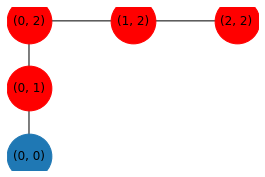

In [121]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers, threshold, system_capacity, buffer_capacity)

In [27]:
sym_pi = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

In [28]:
abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]

In [45]:
sym_Lambda = sym.symbols("Lambda")
sym_lambda_1 = sym.symbols("lambda_1")
sym_lambda_2 = sym.symbols("lambda_2")
sym_mu = sym.symbols("mu")

In [46]:
# (0,0)
(sym.simplify(sym_pi[e]) * sym_mu ** 4) / (sym_lambda_2 ** 2 * sym_Lambda ** 2)



                    4                   
                   μ                    
────────────────────────────────────────
 2     2    2           2  2      3    4
Λ ⋅λ__A  + Λ ⋅λ__A⋅μ + Λ ⋅μ  + Λ⋅μ  + μ 

In [47]:
# (0,1)
(sym.simplify(sym_pi[e]) * sym_mu ** 3) / (sym_lambda_2 ** 2 * sym_Lambda)

                     3                  
                  Λ⋅μ                   
────────────────────────────────────────
 2     2    2           2  2      3    4
Λ ⋅λ__A  + Λ ⋅λ__A⋅μ + Λ ⋅μ  + Λ⋅μ  + μ 

In [69]:
# (0,2)
sym.simplify(sym_pi[c])

                  2  2                  
                 Λ ⋅μ                   
────────────────────────────────────────
 2     2    2           2  2      3    4
Λ ⋅λ__A  + Λ ⋅λ__A⋅μ + Λ ⋅μ  + Λ⋅μ  + μ 

In [67]:
# (1,2)
sym.simplify(sym_pi[d])

                2                       
               Λ ⋅λ__A⋅μ                
────────────────────────────────────────
 2     2    2           2  2      3    4
Λ ⋅λ__A  + Λ ⋅λ__A⋅μ + Λ ⋅μ  + Λ⋅μ  + μ 

In [65]:
# (2,2)
sym.simplify(sym_pi[e])

                 2     2                
                Λ ⋅λ__A                 
────────────────────────────────────────
 2     2    2           2  2      3    4
Λ ⋅λ__A  + Λ ⋅λ__A⋅μ + Λ ⋅μ  + Λ⋅μ  + μ 

# Verify results

In [10]:
num_of_servers = 1
threshold = 1
system_capacity = 2
buffer_capacity = 1

In [11]:
abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
sym_pi = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

In [12]:
lambda_2 = 0.2
lambda_1 = 0.1
mu = 0.4

In [23]:
`
[sym_pi[key].subs({sym_Lambda: lambda_2 + lambda_1, sym_lambda_1: lambda_1, sym_lambda_2: lambda_2, sym_mu: mu}) for key in sym_pi.keys()]

[0.402515723270440,
 0.301886792452830,
 0.176100628930818,
 0.0503144654088050,
 0.0691823899371068]

In [22]:
all_states = abg.markov.build_states(threshold, system_capacity, buffer_capacity)
Q = abg.markov.get_transition_matrix(
    lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity
)
sol3 = abg.markov.get_steady_state_algebraically(Q, algebraic_function=np.linalg.solve)
list(sol3)

[0.4025157232704404,
 0.30188679245283023,
 0.17610062893081757,
 0.050314465408805034,
 0.06918238993710682]

# $\pi$ for larger models

# $C=1, T=3, N=4, M=1$

In [69]:
lambda_2 = 0.2
lambda_1 = 0.1
mu = 0.4

num_of_servers = 1
threshold = 3
system_capacity = 4
buffer_capacity = 1

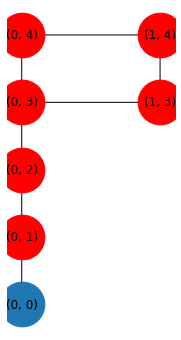

In [70]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers, threshold, system_capacity, buffer_capacity)

In [32]:
all_states = abg.markov.build_states(threshold, system_capacity, buffer_capacity)
Q = abg.markov.get_transition_matrix(
    lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity
)
sol = abg.markov.get_steady_state_algebraically(Q, algebraic_function=np.linalg.solve)
sol

array([0.31771641, 0.23828731, 0.17871548, 0.13403661, 0.07818802,
       0.02233944, 0.03071672])

In [33]:
def pi_for_1_server_3_threshold_4_sys_1_par(lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity):
    all_states = abg.markov.build_states(threshold, system_capacity, buffer_capacity)
    Lambda = lambda_2 + lambda_1
    pi = [0 for _ in range(len(all_states))]
    pi[0] = (lambda_2) * (mu ** 5) + (mu ** 6)  # (0,0)
    pi[1] = Lambda * lambda_2 * (mu ** 4) + Lambda * (mu ** 5)  # (0,1)
    pi[2] = (Lambda ** 2) * lambda_2 * (mu ** 3) + (Lambda ** 2) * (mu ** 4)    # (0,2)
    pi[3] = (Lambda ** 3) * lambda_2 * (mu ** 2) + (Lambda ** 3) * (mu ** 3)    # (0,3)
    pi[4] = (Lambda ** 3) * lambda_1 * lambda_2 * mu + (Lambda ** 3) * lambda_2 * (mu ** 2) + (Lambda ** 3) * lambda_2 * lambda_2 * mu     # (1,3)
    pi[5] = (Lambda ** 3) * lambda_1 * (mu ** 2)    # (0,4)
    pi[6] = (Lambda ** 3) * (lambda_1 ** 2) * lambda_2 + (Lambda ** 3) * lambda_1 * (lambda_2 ** 2) + 2 * (Lambda ** 3) * lambda_1 * lambda_2 * mu    # (1,4)
    sum_of_rates = sum(pi)
    pi = [i/sum_of_rates for i in pi]
    return pi


In [35]:
ans = pi_for_1_server_3_threshold_4_sys_1_par(lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity)

In [36]:
for i in range(7):
    print(str(ans[i]) + " " + str(sol[i]) + " ---> " + str(round(ans[i], 10) == round(sol[i], 10)))

0.3177164132795532 0.3177164132795532 ---> True
0.2382873099596649 0.23828730995966502 ---> True
0.1787154824697487 0.1787154824697487 ---> True
0.13403661185231155 0.13403661185231147 ---> True
0.07818802358051506 0.07818802358051498 ---> True
0.022339435308718594 0.022339435308718583 ---> True
0.030716723549488064 0.030716723549487967 ---> True


# $C=1, T=1, N=2, M=2$

In [118]:
lambda_2 = 1
lambda_1 = 1
mu = 3

num_of_servers = 1
threshold = 1
system_capacity = 2
buffer_capacity = 2

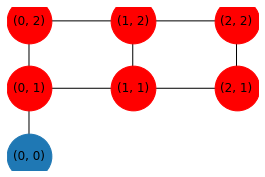

In [119]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers, threshold, system_capacity, buffer_capacity)

In [125]:
all_states = abg.markov.build_states(threshold, system_capacity, buffer_capacity)
Q = abg.markov.get_transition_matrix(
    lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity
)
sol = abg.markov.get_steady_state_algebraically(Q, algebraic_function=np.linalg.solve)
sol

array([0.41116751, 0.27411168, 0.1142132 , 0.05329949, 0.06852792,
       0.04568528, 0.03299492])

In [126]:
all_states

[(0, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (2, 2)]

In [157]:
def pi_for_1_server_1_threshold_2_sys_2_par(lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity):
    all_states = abg.markov.build_states(threshold, system_capacity, buffer_capacity)
    Lambda = lambda_2 + lambda_1

    pi = [0 for _ in range(len(all_states))]
    pi[0] = (mu ** 6) + 2 * (lambda_2) * (mu ** 5) + (lambda_2 ** 2) * (mu ** 4) # (0,0)
    pi[1] = (Lambda * mu ** 3) * (mu ** 2 + 2 * mu * lambda_2 + lambda_2 ** 2)  # (0,1)
    pi[2] = (Lambda * lambda_2 * mu ** 2) * (lambda_2 ** 2 + lambda_2 * lambda_1 + lambda_1 * mu + mu ** 2 + 2 * lambda_2 * mu) # (1,1)
    pi[3] = (Lambda * lambda_2 ** 2 * mu) * (lambda_2 ** 2 + 2 * lambda_1 * lambda_2 + 3 * lambda_1 * mu + mu ** 2 + 2 * lambda_2 * mu + lambda_1 ** 2) # (2,1)
    pi[4] = (Lambda * lambda_1 * mu ** 3) * (lambda_2 + mu)  # (0,2)
    pi[5] = (Lambda * lambda_1 * lambda_2 * mu ** 2) * (2 * mu + lambda_1 + lambda_2)   # (1,2)
    pi[6] = (Lambda * lambda_1 * lambda_2 ** 2) * (lambda_1 ** 2 + 4 * lambda_1 * mu + 2 * lambda_1 * lambda_2 + 3 * mu ** 2 + lambda_2 ** 2 + 3 * lambda_2 * mu)    # (2,2)
    sum_of_rates = sum(pi)
    pi = [i/sum_of_rates for i in pi]
    return pi


In [158]:
ans = pi_for_1_server_1_threshold_2_sys_2_par(lambda_2, lambda_1, mu, num_of_servers, threshold, system_capacity, buffer_capacity)

In [159]:
for i in range(7):
    print(str(ans[i]) + " " + str(sol[i]) + " ---> " + str(round(ans[i], 10) == round(sol[i], 10)))

0.41116751269035534 0.4111675126903551 ---> True
0.27411167512690354 0.27411167512690343 ---> True
0.11421319796954314 0.11421319796954318 ---> True
0.0532994923857868 0.05329949238578686 ---> True
0.06852791878172589 0.06852791878172587 ---> True
0.04568527918781726 0.04568527918781726 ---> True
0.03299492385786802 0.032994923857868085 ---> True


In [160]:
sym_pi = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

In [130]:
exp = sym.factor(sym_pi[g])

In [131]:
exp

                                                                              
                                                                              
──────────────────────────────────────────────────────────────────────────────
      4              4             3     2           3                  3  2  
Λ⋅λ__A ⋅λ__o + Λ⋅λ__A ⋅μ + 2⋅Λ⋅λ__A ⋅λ__o  + 5⋅Λ⋅λ__A ⋅λ__o⋅μ + 3⋅Λ⋅λ__A ⋅μ  +

               2      ⎛    2                                2                 
         Λ⋅λ__A ⋅λ__o⋅⎝λ__A  + 2⋅λ__A⋅λ__o + 3⋅λ__A⋅μ + λ__o  + 4⋅λ__o⋅μ + 3⋅μ
──────────────────────────────────────────────────────────────────────────────
       2     3           2     2             2       2           2  3         
 Λ⋅λ__A ⋅λ__o  + 5⋅Λ⋅λ__A ⋅λ__o ⋅μ + 8⋅Λ⋅λ__A ⋅λ__o⋅μ  + 4⋅Λ⋅λ__A ⋅μ  + Λ⋅λ__A

2⎞                                                                            
 ⎠                                                                            
──────────────────────────────────────────────────

# Investigating ratio relations $\frac{\pi_i}{\pi_j}$

In [2]:
sym.init_printing(use_latex='mathjax')
def get_symbolic_pi(num_of_servers, threshold, system_capacity, buffer_capacity):
    Q_sym = abg.markov.get_symbolic_transition_matrix(num_of_servers=num_of_servers, 
                                            threshold=threshold, 
                                            system_capacity=system_capacity,
                                            buffer_capacity=buffer_capacity)
    dimension =  Q_sym.shape[0]
    if dimension > 7:
        return "Capacity of 6 exceeded"
    M_sym = sym.Matrix([Q_sym.transpose()[:-1,:], sym.ones(1,dimension)])
    b_sym = sym.Matrix([sym.zeros(dimension - 1, 1), [1]])
    system = M_sym.col_insert(dimension,b_sym)
    sol = sym.solve_linear_system_LU(system, [a,b,c,d,e,f,g])
    return sol



## $C=1, T=2, N=2, M=2$

In [3]:
num_of_servers = 1
threshold = 2
system_capacity = 2
buffer_capacity = 2

sym_pi_1222 = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
all_states_1222 = abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
sym_state_probs_1222 = [0 for _ in range(len(all_states_1222))]
all_states_1222


[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]

In [4]:
sym_state_probs_1222[0] = sym.factor(sym_pi_1222[a]) # (0,0)
sym_state_probs_1222[1] = sym.factor(sym_pi_1222[b]) # (0,1)
sym_state_probs_1222[2] = sym.factor(sym_pi_1222[c]) # (1,1)
sym_state_probs_1222[3] = sym.factor(sym_pi_1222[d]) # (0,2)
sym_state_probs_1222[4] = sym.factor(sym_pi_1222[e]) # (1,2)


In [6]:
sym_state_recursive_ratios_1222 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_1222[0,0] = 1
sym_state_recursive_ratios_1222[0,1] = sym.factor(sym_state_probs_1222[1] / sym_state_probs_1222[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_1222[0,2] = sym.factor(sym_state_probs_1222[2] / sym_state_probs_1222[1])  # (0,1) -> (1,1)
sym_state_recursive_ratios_1222[1,2] = sym.factor(sym_state_probs_1222[3] / sym_state_probs_1222[2])  # (0,1) -> (0,2)
sym_state_recursive_ratios_1222[2,2] = sym.factor(sym_state_probs_1222[4] / sym_state_probs_1222[3])  # (0,2) -> (1,2)


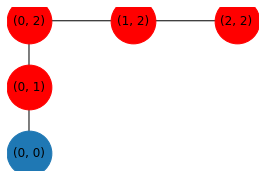

In [5]:
abg.markov.visualise_ambulance_markov_chain(
    num_of_servers=num_of_servers, 
    threshold=threshold, 
    system_capacity=system_capacity, 
    buffer_capacity=buffer_capacity
)

In [7]:
sym_state_recursive_ratios_1222

⎡   Λ   Λ  ⎤
⎢1  ─   ─  ⎥
⎢   μ   μ  ⎥
⎢          ⎥
⎢      λ__A⎥
⎢0  0  ────⎥
⎢       μ  ⎥
⎢          ⎥
⎢      λ__A⎥
⎢0  0  ────⎥
⎣       μ  ⎦

## $C=1, T=1, N=2, M=1$

In [8]:
num_of_servers = 1
threshold = 1
system_capacity = 2
buffer_capacity = 1

all_states_1121 = abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
Q_sym_1121 = abg.markov.get_symbolic_transition_matrix(num_of_servers, threshold, system_capacity, buffer_capacity)
sym_pi_1121 = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
sym_state_probs_1121 = [0 for _ in range(len(all_states_1121))]

In [9]:
sym_state_probs_1121[0] = sym.factor(sym_pi_1121[a]) # (0,0)
sym_state_probs_1121[1] = sym.factor(sym_pi_1121[b]) # (0,1)
sym_state_probs_1121[2] = sym.factor(sym_pi_1121[c]) # (1,1)
sym_state_probs_1121[3] = sym.factor(sym_pi_1121[d]) # (0,2)
sym_state_probs_1121[4] = sym.factor(sym_pi_1121[e]) # (1,2)


In [10]:
sym_state_recursive_ratios_1121 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_1121[0,0] = 1
sym_state_recursive_ratios_1121[0,1] = sym.factor(sym_state_probs_1121[1] / sym_state_probs_1121[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_1121[1,1] = sym.factor(sym_state_probs_1121[2] / sym_state_probs_1121[1])  # (0,1) -> (1,1)
sym_state_recursive_ratios_1121[0,2] = sym.factor(sym_state_probs_1121[3] / sym_state_probs_1121[1])  # (0,1) -> (0,2)
sym_state_recursive_ratios_1121[1,2] = sym.factor(sym_state_probs_1121[4] / sym_state_probs_1121[3])  # (0,2) -> (1,2)

sym_state_recursive_ratios_right_1121 = sym_state_recursive_ratios_1121.copy()
sym_state_recursive_ratios_right_1121[1,2] = sym.factor(sym_state_probs_1121[4] / sym_state_probs_1121[2])  # (1,1) -> (1,2)

sym_state_recursive_ratios_P0_1121 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_P0_1121[0,0] = 1
sym_state_recursive_ratios_P0_1121[0,1] = sym.factor(sym_state_probs_1121[1] / sym_state_probs_1121[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_P0_1121[1,1] = sym.factor(sym_state_probs_1121[2] / sym_state_probs_1121[0])  # (0,0) -> (1,1)
sym_state_recursive_ratios_P0_1121[0,2] = sym.factor(sym_state_probs_1121[3] / sym_state_probs_1121[0])  # (0,0) -> (0,2)
sym_state_recursive_ratios_P0_1121[1,2] = sym.factor(sym_state_probs_1121[4] / sym_state_probs_1121[0])  # (0,0) -> (1,2)


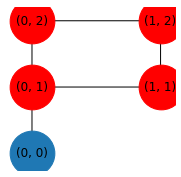

In [11]:
abg.markov.visualise_ambulance_markov_chain(
    num_of_servers=num_of_servers, 
    threshold=threshold, 
    system_capacity=system_capacity, 
    buffer_capacity=buffer_capacity
)

In [12]:
all_states_1121

[(0, 0), (0, 1), (1, 1), (0, 2), (1, 2)]

In [13]:
sym_state_probs_1121

⎡                                               3                             
⎢                                              μ ⋅(λ__A + μ)                  
⎢─────────────────────────────────────────────────────────────────────────────
⎢      2              2                2                               2      
⎣Λ⋅λ__A ⋅λ__o + Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 3⋅Λ⋅λ__A⋅λ__o⋅μ + 2⋅Λ⋅λ__A⋅μ  + Λ⋅λ

                                                                              
                                                                           Λ⋅μ
────────────────────────────, ────────────────────────────────────────────────
     2      3         3    4        2              2                2         
__o⋅μ  + Λ⋅μ  + λ__A⋅μ  + μ   Λ⋅λ__A ⋅λ__o + Λ⋅λ__A ⋅μ + Λ⋅λ__A⋅λ__o  + 3⋅Λ⋅λ_

2                                                                             
 ⋅(λ__A + μ)                                                                  
──────────────────────────────────────────────────

In [14]:
Q_sym_1121

⎡-Λ         Λ              0          0       0  ⎤
⎢                                                ⎥
⎢μ   -λ__A - λ__o - μ    λ__A       λ__o      0  ⎥
⎢                                                ⎥
⎢0          μ          -λ__o - μ      0      λ__o⎥
⎢                                                ⎥
⎢0          μ              0      -λ__A - μ  λ__A⎥
⎢                                                ⎥
⎣0          0              μ          0       -μ ⎦

In [15]:
sym_state_recursive_ratios_1121, sym_state_recursive_ratios_right_1121

⎛⎡             Λ                       λ__o          ⎤                        
⎜⎢1            ─                     ────────        ⎥  ⎡             Λ       
⎜⎢             μ                     λ__A + μ        ⎥  ⎢1            ─       
⎜⎢                                                   ⎥  ⎢             μ       
⎜⎢   λ__A⋅(λ__A + λ__o + μ)  λ__A⋅(λ__A + λ__o + 2⋅μ)⎥, ⎢                     
⎜⎢0  ──────────────────────  ────────────────────────⎥  ⎢   λ__A⋅(λ__A + λ__o 
⎜⎢        μ⋅(λ__A + μ)                   2           ⎥  ⎢0  ──────────────────
⎝⎣                                      μ            ⎦  ⎣        μ⋅(λ__A + μ) 

                               ⎞
                λ__o          ⎤⎟
              ────────        ⎥⎟
              λ__A + μ        ⎥⎟
                              ⎥⎟
+ μ)  λ__o⋅(λ__A + λ__o + 2⋅μ)⎥⎟
────  ────────────────────────⎥⎟
        μ⋅(λ__A + λ__o + μ)   ⎦⎠

In [16]:
sym.fraction(sym_state_probs_1121[0])[0], sym_state_recursive_ratios_P0_1121


⎛               ⎡              Λ                          Λ⋅λ__o             ⎤
⎜               ⎢1             ─                       ────────────          ⎥
⎜               ⎢              μ                       μ⋅(λ__A + μ)          ⎥
⎜ 3             ⎢                                                            ⎥
⎜μ ⋅(λ__A + μ), ⎢   Λ⋅λ__A⋅(λ__A + λ__o + μ)  Λ⋅λ__A⋅λ__o⋅(λ__A + λ__o + 2⋅μ)⎥
⎜               ⎢0  ────────────────────────  ───────────────────────────────⎥
⎜               ⎢         2                             3                    ⎥
⎝               ⎣        μ ⋅(λ__A + μ)                 μ ⋅(λ__A + μ)         ⎦

⎞
⎟
⎟
⎟
⎟
⎟
⎟
⎠

## $C=1, T=1, N=2, M=2$

In [17]:
num_of_servers = 1
threshold = 1
system_capacity = 2
buffer_capacity = 2

all_states_1122 = abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
Q_sym_1122 = abg.markov.get_symbolic_transition_matrix(num_of_servers, threshold, system_capacity, buffer_capacity)
sym_pi_1122 = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
sym_state_probs_1122 = [0 for _ in range(len(all_states_1122))]

In [18]:
sym_Lambda = sym.symbols("Lambda")
sym_lambda_1 = sym.symbols("lambda_1")
sym_lambda_2 = sym.symbols("lambda_2")
sym_mu = sym.symbols("mu")

In [19]:
sym_state_probs_1122[0] = (sym_mu ** 6) + 2 * (sym_lambda_2) * (sym_mu ** 5) + (sym_lambda_2 ** 2) * (sym_mu ** 4) # (0,0)
sym_state_probs_1122[1] = (sym_Lambda * sym_mu ** 3) * (sym_mu ** 2 + 2 * sym_mu * sym_lambda_2 + sym_lambda_2 ** 2)  # (0,1)
sym_state_probs_1122[2] = (sym_Lambda * sym_lambda_2 * sym_mu ** 2) * (sym_lambda_2 ** 2 + sym_lambda_2 * sym_lambda_1 + sym_lambda_1 * sym_mu + sym_mu ** 2 + 2 * sym_lambda_2 * sym_mu) # (1,1)
sym_state_probs_1122[3] = (sym_Lambda * sym_lambda_2 ** 2 * sym_mu) * (sym_lambda_2 ** 2 + 2 * sym_lambda_1 * sym_lambda_2 + 3 * sym_lambda_1 * sym_mu + sym_mu ** 2 + 2 * sym_lambda_2 * sym_mu + sym_lambda_1 ** 2) # (2,1)
sym_state_probs_1122[4] = (sym_Lambda * sym_lambda_1 * sym_mu ** 3) * (sym_lambda_2 + sym_mu)  # (0,2)
sym_state_probs_1122[5] = (sym_Lambda * sym_lambda_1 * sym_lambda_2 * sym_mu ** 2) * (2 * sym_mu + sym_lambda_1 + sym_lambda_2)   # (1,2)
sym_state_probs_1122[6] = (sym_Lambda * sym_lambda_1 * sym_lambda_2 ** 2) * (sym_lambda_1 ** 2 + 4 * sym_lambda_1 * sym_mu + 2 * sym_lambda_1 * sym_lambda_2 + 3 * sym_mu ** 2 + sym_lambda_2 ** 2 + 3 * sym_lambda_2 * sym_mu)    # (2,2)

In [20]:
sym_state_recursive_ratios_1122 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_1122[0,0] = 1
sym_state_recursive_ratios_1122[0,1] = sym.factor(sym_state_probs_1122[1] / sym_state_probs_1122[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_1122[1,1] = sym.factor(sym_state_probs_1122[2] / sym_state_probs_1122[1])  # (0,1) -> (1,1)
sym_state_recursive_ratios_1122[2,1] = sym.factor(sym_state_probs_1122[3] / sym_state_probs_1122[2])  # (1,1) -> (2,1)

sym_state_recursive_ratios_1122[0,2] = sym.factor(sym_state_probs_1122[4] / sym_state_probs_1122[1])  # (0,1) -> (0,2)
sym_state_recursive_ratios_1122[1,2] = sym.factor(sym_state_probs_1122[5] / sym_state_probs_1122[4])  # (0,2) -> (1,2)
sym_state_recursive_ratios_1122[2,2] = sym.factor(sym_state_probs_1122[6] / sym_state_probs_1122[5])  # (1,2) -> (2,2)

sym_state_recursive_ratios_right_1122 = sym_state_recursive_ratios_1122.copy()
sym_state_recursive_ratios_right_1122[1,2] = sym.factor(sym_state_probs_1122[5] / sym_state_probs_1122[2])  # (1,1) -> (1,2)
sym_state_recursive_ratios_right_1122[2,2] = sym.factor(sym_state_probs_1122[6] / sym_state_probs_1122[3])  # (2,1) -> (2,2)

sym_state_recursive_ratios_P0_1122 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_P0_1122[0,0] = 1
sym_state_recursive_ratios_P0_1122[0,1] = sym.factor(sym_state_probs_1122[1] / sym_state_probs_1122[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_P0_1122[1,1] = sym.factor(sym_state_probs_1122[2] / sym_state_probs_1122[0])  # (0,0) -> (1,1)
sym_state_recursive_ratios_P0_1122[2,1] = sym.factor(sym_state_probs_1122[3] / sym_state_probs_1122[0])  # (0,0) -> (2,1)

sym_state_recursive_ratios_P0_1122[0,2] = sym.factor(sym_state_probs_1122[4] / sym_state_probs_1122[0])  # (0,0) -> (0,2)
sym_state_recursive_ratios_P0_1122[1,2] = sym.factor(sym_state_probs_1122[5] / sym_state_probs_1122[0])  # (0,0) -> (1,2)
sym_state_recursive_ratios_P0_1122[2,2] = sym.factor(sym_state_probs_1122[6] / sym_state_probs_1122[0])  # (0,0) -> (2,2)


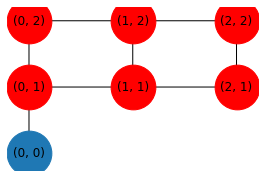

In [21]:
abg.markov.visualise_ambulance_markov_chain(
    num_of_servers=num_of_servers, 
    threshold=threshold, 
    system_capacity=system_capacity, 
    buffer_capacity=buffer_capacity
)

In [22]:
all_states_1122

[(0, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (2, 2)]

In [23]:
Q_sym_1122

⎡-Λ         Λ                 0              0          0          0       0  
⎢                                                                             
⎢μ   -λ__A - λ__o - μ        λ__A            0        λ__o         0       0  
⎢                                                                             
⎢0          μ          -λ__A - λ__o - μ    λ__A         0        λ__o      0  
⎢                                                                             
⎢0          0                 μ          -λ__o - μ      0          0      λ__o
⎢                                                                             
⎢0          μ                 0              0      -λ__A - μ    λ__A      0  
⎢                                                                             
⎢0          0                 μ              0          0      -λ__A - μ  λ__A
⎢                                                                             
⎣0          0                 0              μ      

In [24]:
sym_state_recursive_ratios_1122, sym_state_recursive_ratios_right_1122

⎛⎡                                 Λ                                          
⎜⎢1                                ─                                          
⎜⎢                                 μ                                          
⎜⎢                                                                            
⎜⎢                      λ__A⋅(λ__A + λ__o + μ)                                
⎜⎢0                     ──────────────────────                                
⎜⎢                           μ⋅(λ__A + μ)                                     
⎜⎢                                                                            
⎜⎢        ⎛    2                                2               2⎞       ⎛    
⎜⎢   λ__A⋅⎝λ__A  + 2⋅λ__A⋅λ__o + 2⋅λ__A⋅μ + λ__o  + 3⋅λ__o⋅μ + μ ⎠  λ__A⋅⎝λ__A
⎜⎢0  ─────────────────────────────────────────────────────────────  ──────────
⎜⎢                   μ⋅(λ__A + μ)⋅(λ__A + λ__o + μ)                           
⎝⎣                                                  

In [25]:
sym_state_probs_1122[0], sym_state_recursive_ratios_P0_1122

⎛                           ⎡                                  Λ              
⎜                           ⎢1                                 ─              
⎜                           ⎢                                  μ              
⎜                           ⎢                                                 
⎜                           ⎢                       Λ⋅λ__A⋅(λ__A + λ__o + μ)  
⎜                           ⎢0                      ────────────────────────  
⎜    2  4           5    6  ⎢                             2                   
⎜λ__A ⋅μ  + 2⋅λ__A⋅μ  + μ , ⎢                            μ ⋅(λ__A + μ)        
⎜                           ⎢                                                 
⎜                           ⎢         2 ⎛    2                                
⎜                           ⎢   Λ⋅λ__A ⋅⎝λ__A  + 2⋅λ__A⋅λ__o + 2⋅λ__A⋅μ + λ__o
⎜                           ⎢0  ──────────────────────────────────────────────
⎜                           ⎢                       

## $C=1, T=3, N=4, M=1$

In [26]:
num_of_servers = 1
threshold = 3
system_capacity = 4
buffer_capacity = 1

all_states_1341 = abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
Q_sym_1341 = abg.markov.get_symbolic_transition_matrix(num_of_servers, threshold, system_capacity, buffer_capacity)
sym_pi_1341 = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
sym_state_probs_1341 = [0 for _ in range(len(all_states_1341))]

In [27]:
sym_Lambda = sym.symbols("Lambda")
sym_lambda_1 = sym.symbols("lambda_1")
sym_lambda_2 = sym.symbols("lambda_2")
sym_mu = sym.symbols("mu")

In [28]:
sym_state_probs_1341[0] = (sym_lambda_2) * (sym_mu ** 5) + (sym_mu ** 6)  # (0,0)
sym_state_probs_1341[1] = sym_Lambda * sym_lambda_2 * (sym_mu ** 4) + sym_Lambda * (sym_mu ** 5)  # (0,1)
sym_state_probs_1341[2] = (sym_Lambda ** 2) * sym_lambda_2 * (sym_mu ** 3) + (sym_Lambda ** 2) * (sym_mu ** 4)    # (0,2)
sym_state_probs_1341[3] = (sym_Lambda ** 3) * sym_lambda_2 * (sym_mu ** 2) + (sym_Lambda ** 3) * (sym_mu ** 3)    # (0,3)
sym_state_probs_1341[4] = (sym_Lambda ** 3) * sym_lambda_1 * sym_lambda_2 * sym_mu + (sym_Lambda ** 3) * sym_lambda_2 * (sym_mu ** 2) + (sym_Lambda ** 3) * sym_lambda_2 * sym_lambda_2 * sym_mu     # (1,3)
sym_state_probs_1341[5] = (sym_Lambda ** 3) * sym_lambda_1 * (sym_mu ** 2)    # (0,4)
sym_state_probs_1341[6] = (sym_Lambda ** 3) * (sym_lambda_1 ** 2) * sym_lambda_2 + (sym_Lambda ** 3) * sym_lambda_1 * (sym_lambda_2 ** 2) + 2 * (sym_Lambda ** 3) * sym_lambda_1 * sym_lambda_2 * sym_mu    # (1,4)

In [29]:
sym_state_recursive_ratios_1341 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_1341[0,0] = 1
sym_state_recursive_ratios_1341[0,1] = sym.factor(sym_state_probs_1341[1] / sym_state_probs_1341[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_1341[0,2] = sym.factor(sym_state_probs_1341[2] / sym_state_probs_1341[1])  # (0,1) -> (0,2)
sym_state_recursive_ratios_1341[0,3] = sym.factor(sym_state_probs_1341[3] / sym_state_probs_1341[2])  # (0,2) -> (0,3)
sym_state_recursive_ratios_1341[0,4] = sym.factor(sym_state_probs_1341[5] / sym_state_probs_1341[3])  # (0,3) -> (0,4)

sym_state_recursive_ratios_1341[1,3] = sym.factor(sym_state_probs_1341[4] / sym_state_probs_1341[3])  # (0,3) -> (1,3)
sym_state_recursive_ratios_1341[1,4] = sym.factor(sym_state_probs_1341[6] / sym_state_probs_1341[5])  # (0,4) -> (1,4)

sym_state_recursive_ratios_right_1341 = sym_state_recursive_ratios_1341.copy()
sym_state_recursive_ratios_right_1341[1,4] = sym.factor(sym_state_probs_1341[6] / sym_state_probs_1341[4])  # (1,3) -> (1,4)

sym_state_recursive_ratios_P0_1341 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_P0_1341[0,0] = 1
sym_state_recursive_ratios_P0_1341[0,1] = sym.factor(sym_state_probs_1341[1] / sym_state_probs_1341[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_P0_1341[0,2] = sym.factor(sym_state_probs_1341[2] / sym_state_probs_1341[0])  # (0,0) -> (0,2)
sym_state_recursive_ratios_P0_1341[0,3] = sym.factor(sym_state_probs_1341[3] / sym_state_probs_1341[0])  # (0,0) -> (0,3)

sym_state_recursive_ratios_P0_1341[1,3] = sym.factor(sym_state_probs_1341[4] / sym_state_probs_1341[0])  # (0,0) -> (1,3)
sym_state_recursive_ratios_P0_1341[0,4] = sym.factor(sym_state_probs_1341[5] / sym_state_probs_1341[0])  # (0,0) -> (0,4)
sym_state_recursive_ratios_P0_1341[1,4] = sym.factor(sym_state_probs_1341[6] / sym_state_probs_1341[0])  # (0,0) -> (1,4)


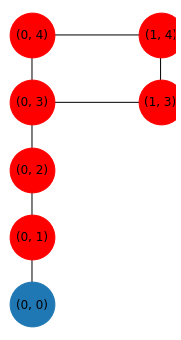

In [30]:
abg.markov.visualise_ambulance_markov_chain(
    num_of_servers=num_of_servers, 
    threshold=threshold, 
    system_capacity=system_capacity, 
    buffer_capacity=buffer_capacity
)

In [31]:
all_states_1341

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (0, 4), (1, 4)]

In [32]:
Q_sym_1341

⎡-Λ    Λ       0            0              0          0       0  ⎤
⎢                                                                ⎥
⎢μ   -Λ - μ    Λ            0              0          0       0  ⎥
⎢                                                                ⎥
⎢0     μ     -Λ - μ         Λ              0          0       0  ⎥
⎢                                                                ⎥
⎢0     0       μ     -λ__A - λ__o - μ    λ__A       λ__o      0  ⎥
⎢                                                                ⎥
⎢0     0       0            μ          -λ__o - μ      0      λ__o⎥
⎢                                                                ⎥
⎢0     0       0            μ              0      -λ__A - μ  λ__A⎥
⎢                                                                ⎥
⎣0     0       0            0              μ          0       -μ ⎦

In [33]:
sym_state_recursive_ratios_1341, sym_state_recursive_ratios_right_1341

⎛⎡   Λ  Λ            Λ                       λ__o          ⎤                  
⎜⎢1  ─  ─            ─                     ────────        ⎥  ⎡   Λ  Λ        
⎜⎢   μ  μ            μ                     λ__A + μ        ⎥  ⎢1  ─  ─        
⎜⎢                                                         ⎥  ⎢   μ  μ        
⎜⎢         λ__A⋅(λ__A + λ__o + μ)  λ__A⋅(λ__A + λ__o + 2⋅μ)⎥, ⎢               
⎜⎢0  0  0  ──────────────────────  ────────────────────────⎥  ⎢         λ__A⋅(
⎜⎢              μ⋅(λ__A + μ)                   2           ⎥  ⎢0  0  0  ──────
⎝⎣                                            μ            ⎦  ⎣              μ

                                           ⎞
    Λ                       λ__o          ⎤⎟
    ─                     ────────        ⎥⎟
    μ                     λ__A + μ        ⎥⎟
                                          ⎥⎟
λ__A + λ__o + μ)  λ__o⋅(λ__A + λ__o + 2⋅μ)⎥⎟
────────────────  ────────────────────────⎥⎟
⋅(λ__A + μ)         μ⋅(λ__A + λ__o + μ)   ⎦⎠

In [34]:
sym_state_recursive_ratios_P0_1341

⎡       2              3                           3                  ⎤
⎢   Λ  Λ              Λ                           Λ ⋅λ__o             ⎥
⎢1  ─  ──             ──                       ─────────────          ⎥
⎢   μ   2              3                        3                     ⎥
⎢      μ              μ                        μ ⋅(λ__A + μ)          ⎥
⎢                                                                     ⎥
⎢           3                          3                              ⎥
⎢          Λ ⋅λ__A⋅(λ__A + λ__o + μ)  Λ ⋅λ__A⋅λ__o⋅(λ__A + λ__o + 2⋅μ)⎥
⎢0  0  0   ─────────────────────────  ────────────────────────────────⎥
⎢                 4                             5                     ⎥
⎣                μ ⋅(λ__A + μ)                 μ ⋅(λ__A + μ)          ⎦

# $C=1, T=1, N=3, M=1$

In [35]:
num_of_servers = 1
threshold = 1
system_capacity = 3
buffer_capacity = 1

all_states_1131 = abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
Q_sym_1131 = abg.markov.get_symbolic_transition_matrix(num_of_servers, threshold, system_capacity, buffer_capacity)
sym_pi_1131 = get_symbolic_pi(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
sym_state_probs_1131 = [0 for _ in range(len(all_states_1131))]

In [36]:
sym_Lambda = sym.symbols("Lambda")
sym_lambda_1 = sym.symbols("lambda_1")
sym_lambda_2 = sym.symbols("lambda_2")
sym_mu = sym.symbols("mu")

In [37]:
# (0,0)
sym_state_probs_1131[0] = (sym_mu ** 6) + 2 * (sym_lambda_2 * (sym_mu ** 5)) + ((sym_lambda_2 ** 2) * (sym_mu ** 4)) + (sym_lambda_1 * sym_lambda_2 * (sym_mu ** 4))
# (0,1)
sym_state_probs_1131[1] = sym_state_probs_1131[0] * sym_Lambda / sym_mu 
# (1,1)
sym_state_probs_1131[2] = (sym_Lambda * (sym_lambda_1 ** 2) * sym_lambda_2 * (sym_mu ** 2)) + (sym_Lambda * sym_lambda_2 * sym_lambda_1 * (sym_mu ** 3)) + 2 * (sym_Lambda * sym_lambda_1 * (sym_lambda_2 ** 2) * (sym_mu ** 2)) + 2 * (sym_Lambda * (sym_lambda_2 ** 2) * (sym_mu ** 3)) + (sym_Lambda * (sym_lambda_2 ** 3) * (sym_mu ** 2)) + (sym_Lambda * sym_lambda_2 * (sym_mu ** 4)) 
# (0,2)
sym_state_probs_1131[3] = sym_Lambda * sym_lambda_1 * sym_mu ** 3 * (sym_lambda_2 + sym_mu)
# (1,2)
sym_state_probs_1131[4] = (sym_Lambda * sym_lambda_2 * sym_lambda_1 * sym_mu) * ((sym_lambda_2 ** 2) + 2 * sym_lambda_2 * sym_lambda_1 + 3 * sym_lambda_2 * sym_mu + (sym_lambda_1 ** 2) + 2 * sym_lambda_1 * sym_mu + 2 * (sym_mu ** 2)) 
# (0,3)
sym_state_probs_1131[5] = sym_Lambda * (sym_lambda_1 ** 2) * (sym_mu ** 3) 
# (1,3)
sym_state_probs_1131[6] = (sym_Lambda * sym_lambda_2 * (sym_lambda_1 ** 2)) * ((sym_lambda_2 ** 2) + 2 * sym_lambda_2 * sym_lambda_1 + 3 * sym_lambda_2 * sym_mu + (sym_lambda_1 ** 2) + 2 * sym_lambda_1 * sym_mu + 3 * (sym_mu ** 2))

denominator = sym_Lambda*sym_lambda_2**3*sym_lambda_1**2 + sym_Lambda*sym_lambda_2**3*sym_lambda_1*sym_mu + sym_Lambda*sym_lambda_2**3*sym_mu**2 + 2*sym_Lambda*sym_lambda_2**2*sym_lambda_1**3 + 5*sym_Lambda*sym_lambda_2**2*sym_lambda_1**2*sym_mu + 5*sym_Lambda*sym_lambda_2**2*sym_lambda_1*sym_mu**2 + 3*sym_Lambda*sym_lambda_2**2*sym_mu**3 + sym_Lambda*sym_lambda_2*sym_lambda_1**4 + 3*sym_Lambda*sym_lambda_2*sym_lambda_1**3*sym_mu + 6*sym_Lambda*sym_lambda_2*sym_lambda_1**2*sym_mu**2 + 5*sym_Lambda*sym_lambda_2*sym_lambda_1*sym_mu**3 + 3*sym_Lambda*sym_lambda_2*sym_mu**4 + sym_Lambda*sym_lambda_1**2*sym_mu**3 + sym_Lambda*sym_lambda_1*sym_mu**4 + sym_Lambda*sym_mu**5 + sym_lambda_2**2*sym_mu**4 + sym_lambda_2*sym_lambda_1*sym_mu**4 + 2*sym_lambda_2*sym_mu**5 + sym_mu**6

sym_state_probs_1131 = [i/denominator for i in sym_state_probs_1131]



In [38]:
sym_state_recursive_ratios_1131 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_1131[0,0] = 1
sym_state_recursive_ratios_1131[0,1] = sym.factor(sym_state_probs_1131[1] / sym_state_probs_1131[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_1131[1,1] = sym.factor(sym_state_probs_1131[2] / sym_state_probs_1131[1])  # (0,1) -> (1,1)
sym_state_recursive_ratios_1131[0,2] = sym.factor(sym_state_probs_1131[3] / sym_state_probs_1131[1])  # (0,1) -> (0,2)
sym_state_recursive_ratios_1131[1,2] = sym.factor(sym_state_probs_1131[4] / sym_state_probs_1131[3])  # (0,2) -> (1,2)
sym_state_recursive_ratios_1131[0,3] = sym.factor(sym_state_probs_1131[5] / sym_state_probs_1131[3])  # (0,2) -> (0,3)
sym_state_recursive_ratios_1131[1,3] = sym.factor(sym_state_probs_1131[6] / sym_state_probs_1131[5])  # (0,3) -> (1,3)

sym_state_recursive_ratios_right_1131 = sym_state_recursive_ratios_1131.copy()
sym_state_recursive_ratios_right_1131[1,2] = sym.factor(sym_state_probs_1131[4] / sym_state_probs_1131[2])  # (1,1) -> (1,2)
sym_state_recursive_ratios_right_1131[1,3] = sym.factor(sym_state_probs_1131[6] / sym_state_probs_1131[4])  # (1,2) -> (1,3)

sym_state_recursive_ratios_P0_1131 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_P0_1131[0,0] = 1
sym_state_recursive_ratios_P0_1131[0,1] = sym.factor(sym_state_probs_1131[1] / sym_state_probs_1131[0])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_P0_1131[1,1] = sym.factor(sym_state_probs_1131[2] / sym_state_probs_1131[0])  # (0,0) -> (1,1)
sym_state_recursive_ratios_P0_1131[0,2] = sym.factor(sym_state_probs_1131[3] / sym_state_probs_1131[0])  # (0,0) -> (0,2)
sym_state_recursive_ratios_P0_1131[1,2] = sym.factor(sym_state_probs_1131[4] / sym_state_probs_1131[0])  # (0,0) -> (1,2)
sym_state_recursive_ratios_P0_1131[0,3] = sym.factor(sym_state_probs_1131[5] / sym_state_probs_1131[0])  # (0,0) -> (0,3)
sym_state_recursive_ratios_P0_1131[1,3] = sym.factor(sym_state_probs_1131[6] / sym_state_probs_1131[0])  # (0,0) -> (1,3)


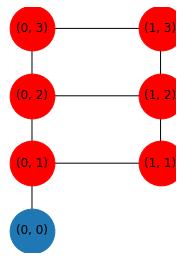

In [39]:
abg.markov.visualise_ambulance_markov_chain(
    num_of_servers=num_of_servers, 
    threshold=threshold, 
    system_capacity=system_capacity, 
    buffer_capacity=buffer_capacity
)

In [40]:
all_states_1131

[(0, 0), (0, 1), (1, 1), (0, 2), (1, 2), (0, 3), (1, 3)]

In [41]:
Q_sym_1131

⎡-Λ         Λ              0             0              0          0       0  
⎢                                                                             
⎢μ   -λ__A - λ__o - μ    λ__A           λ__o            0          0       0  
⎢                                                                             
⎢0          μ          -λ__o - μ         0            λ__o         0       0  
⎢                                                                             
⎢0          μ              0      -λ__A - λ__o - μ    λ__A       λ__o      0  
⎢                                                                             
⎢0          0              μ             0          -λ__o - μ      0      λ__o
⎢                                                                             
⎢0          0              0             μ              0      -λ__A - μ  λ__A
⎢                                                                             
⎣0          0              0             0          

In [42]:
sym_state_recursive_ratios_1131, sym_state_recursive_ratios_right_1131

⎛⎡                                Λ                                           
⎜⎢1                               ─                                           
⎜⎢                                μ                                           
⎜⎢                                                                            
⎜⎢                                                                            
⎜⎢        ⎛    2                                2             2⎞       ⎛    2 
⎜⎢   λ__A⋅⎝λ__A  + 2⋅λ__A⋅λ__o + 2⋅λ__A⋅μ + λ__o  + λ__o⋅μ + μ ⎠  λ__A⋅⎝λ__A  
⎜⎢0  ───────────────────────────────────────────────────────────  ────────────
⎜⎢                ⎛    2                           2⎞                         
⎝⎣              μ⋅⎝λ__A  + λ__A⋅λ__o + 2⋅λ__A⋅μ + μ ⎠                         

            λ__o⋅(λ__A + μ)                                                   
   ─────────────────────────────────                                          
       2                           2               

In [43]:
sym_state_recursive_ratios_P0_1131

⎡                                                                             
⎢                                 Λ                                           
⎢1                                ─                                           
⎢                                 μ                                           
⎢                                                                             
⎢                                                                             
⎢          ⎛    2                                2             2⎞             
⎢   Λ⋅λ__A⋅⎝λ__A  + 2⋅λ__A⋅λ__o + 2⋅λ__A⋅μ + λ__o  + λ__o⋅μ + μ ⎠  Λ⋅λ__A⋅λ__o
⎢0  ─────────────────────────────────────────────────────────────  ───────────
⎢                2 ⎛    2                           2⎞                        
⎣               μ ⋅⎝λ__A  + λ__A⋅λ__o + 2⋅λ__A⋅μ + μ ⎠                        

                                                                              
               Λ⋅λ__o⋅(λ__A + μ)                   

## $C=1, T=1, N=3, M=2$

In [2]:
num_of_servers = 1
threshold = 1
system_capacity = 3
buffer_capacity = 2

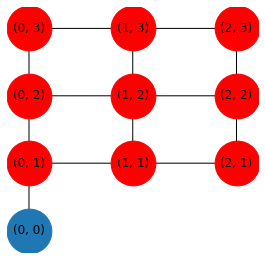

In [3]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=1, system_capacity=3, buffer_capacity=2)

In [4]:
all_states_1132 = abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
Q_sym_1132 = abg.markov.get_symbolic_transition_matrix(num_of_servers, threshold, system_capacity, buffer_capacity)

p00, p01, p11, p21, p02, p12, p22, p03, p13, p23 = sym.symbols('p00, p01, p11, p21, p02, p12, p22, p03, p13, p23')
pi_1132 = sym.Matrix([p00, p01, p11, p21, p02, p12, p22, p03, p13, p23])
dimension_1132 = Q_sym_1132.shape[0]

M_sym_1132 = sym.Matrix([Q_sym_1132.transpose()[:-1,:], sym.ones(1,dimension_1132)])
sym_diff_equations_1132 = (M_sym_1132 @ pi_1132)

b_sym_1132 = sym.Matrix([sym.zeros(dimension_1132 - 1, 1), [1]])

In [6]:
eq0_1132 = sym.Eq(sym_diff_equations_1132[0],b_sym_1132[0])
eq1_1132 = sym.Eq(sym_diff_equations_1132[1],b_sym_1132[1])
eq2_1132 = sym.Eq(sym_diff_equations_1132[2],b_sym_1132[2])
eq3_1132 = sym.Eq(sym_diff_equations_1132[3],b_sym_1132[3])
eq4_1132 = sym.Eq(sym_diff_equations_1132[4],b_sym_1132[4])
eq5_1132 = sym.Eq(sym_diff_equations_1132[5],b_sym_1132[5])
eq6_1132 = sym.Eq(sym_diff_equations_1132[6],b_sym_1132[6])
eq7_1132 = sym.Eq(sym_diff_equations_1132[7],b_sym_1132[7])
eq8_1132 = sym.Eq(sym_diff_equations_1132[8],b_sym_1132[8])
eq9_1132 = sym.Eq(sym_diff_equations_1132[9],b_sym_1132[9])

In [7]:
sym_state_probs_1132 = sym.solve([eq0_1132,eq1_1132,eq2_1132,eq3_1132,eq4_1132,eq5_1132,eq6_1132,eq7_1132,eq8_1132,eq9_1132],(p00,p01,p11,p21,p02,p12,p22,p03,p13,p23))

In [8]:
sym_state_recursive_ratios_1132 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_1132[0,0] = 1
sym_state_recursive_ratios_1132[0,1] = sym.factor(sym_state_probs_1132[p01] / sym_state_probs_1132[p00])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_1132[1,1] = sym.factor(sym_state_probs_1132[p11] / sym_state_probs_1132[p01])  # (0,1) -> (1,1)
sym_state_recursive_ratios_1132[2,1] = sym.factor(sym_state_probs_1132[p21] / sym_state_probs_1132[p11])  # (1,1) -> (2,1)
sym_state_recursive_ratios_1132[0,2] = sym.factor(sym_state_probs_1132[p02] / sym_state_probs_1132[p01])  # (0,1) -> (0,2)
sym_state_recursive_ratios_1132[1,2] = sym.factor(sym_state_probs_1132[p12] / sym_state_probs_1132[p02])  # (0,2) -> (1,2)
sym_state_recursive_ratios_1132[2,2] = sym.factor(sym_state_probs_1132[p22] / sym_state_probs_1132[p12])  # (1,2) -> (2,2)
sym_state_recursive_ratios_1132[0,3] = sym.factor(sym_state_probs_1132[p03] / sym_state_probs_1132[p02])  # (0,2) -> (0,3)
sym_state_recursive_ratios_1132[1,3] = sym.factor(sym_state_probs_1132[p13] / sym_state_probs_1132[p03])  # (0,3) -> (1,3)
sym_state_recursive_ratios_1132[2,3] = sym.factor(sym_state_probs_1132[p23] / sym_state_probs_1132[p13])  # (1,3) -> (2,3)

sym_state_recursive_ratios_right_1132 = sym_state_recursive_ratios_1132.copy()
sym_state_recursive_ratios_right_1132[1,2] = sym.factor(sym_state_probs_1132[p12] / sym_state_probs_1132[p11])  # (1,1) -> (1,2)
sym_state_recursive_ratios_right_1132[1,3] = sym.factor(sym_state_probs_1132[p13] / sym_state_probs_1132[p12])  # (1,2) -> (1,3)
sym_state_recursive_ratios_right_1132[2,2] = sym.factor(sym_state_probs_1132[p22] / sym_state_probs_1132[p21])  # (2,1) -> (2,2)
sym_state_recursive_ratios_right_1132[2,3] = sym.factor(sym_state_probs_1132[p23] / sym_state_probs_1132[p22])  # (2,2) -> (2,3)

sym_state_recursive_ratios_P0_1132 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_P0_1132[0,0] = 1
sym_state_recursive_ratios_P0_1132[0,1] = sym.factor(sym_state_probs_1132[p01] / sym_state_probs_1132[p00])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_P0_1132[1,1] = sym.factor(sym_state_probs_1132[p11] / sym_state_probs_1132[p00])  # (0,0) -> (1,1)
sym_state_recursive_ratios_P0_1132[2,1] = sym.factor(sym_state_probs_1132[p21] / sym_state_probs_1132[p00])  # (0,0) -> (2,1)
sym_state_recursive_ratios_P0_1132[0,2] = sym.factor(sym_state_probs_1132[p02] / sym_state_probs_1132[p00])  # (0,0) -> (0,2)
sym_state_recursive_ratios_P0_1132[1,2] = sym.factor(sym_state_probs_1132[p12] / sym_state_probs_1132[p00])  # (0,0) -> (1,2)
sym_state_recursive_ratios_P0_1132[2,2] = sym.factor(sym_state_probs_1132[p22] / sym_state_probs_1132[p00])  # (0,0) -> (2,2)
sym_state_recursive_ratios_P0_1132[0,3] = sym.factor(sym_state_probs_1132[p03] / sym_state_probs_1132[p00])  # (0,0) -> (0,3)
sym_state_recursive_ratios_P0_1132[1,3] = sym.factor(sym_state_probs_1132[p13] / sym_state_probs_1132[p00])  # (0,0) -> (1,3)
sym_state_recursive_ratios_P0_1132[2,3] = sym.factor(sym_state_probs_1132[p23] / sym_state_probs_1132[p00])  # (0,0) -> (2,3)

In [9]:
sym_state_recursive_ratios_1132

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Lambda/mu,                                                                                                                                                                                                                                                                                                                                                                                                                                              lambda_1*(lambda_2 + mu)/(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + 

In [10]:
sym_state_recursive_ratios_right_1132

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Lambda/mu,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [11]:
sym_state_recursive_ratios_P0_1132

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                Lambda/mu,                                                                                                                                                                                                                                                                                                                                       Lambda*lambda_1*(lambda_2 + mu)/(mu*(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2)),                                                                                                                                                            

## $C=1, T=1, N=4, M=1$

In [2]:
num_of_servers = 1
threshold = 1
system_capacity = 4
buffer_capacity = 1

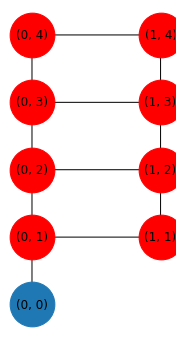

In [3]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=1, system_capacity=4, buffer_capacity=1)

In [4]:
all_states_1141 = abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
Q_sym_1141 = abg.markov.get_symbolic_transition_matrix(num_of_servers, threshold, system_capacity, buffer_capacity)

p00, p01, p11, p02, p12, p03, p13, p04, p14 = sym.symbols('p00, p01, p11, p02, p12, p03, p13, p04, p14')
pi_1141 = sym.Matrix([p00, p01, p11, p02, p12, p03, p13, p04, p14])
dimension_1141 = Q_sym_1141.shape[0]

M_sym_1141 = sym.Matrix([Q_sym_1141.transpose()[:-1,:], sym.ones(1,dimension_1141)])
sym_diff_equations_1141 = (M_sym_1141 @ pi_1141)

b_sym_1141 = sym.Matrix([sym.zeros(dimension_1141 - 1, 1), [1]])

In [22]:
eq0_1141 = sym.Eq(sym_diff_equations_1141[0],b_sym_1141[0])
eq1_1141 = sym.Eq(sym_diff_equations_1141[1],b_sym_1141[1])
eq2_1141 = sym.Eq(sym_diff_equations_1141[2],b_sym_1141[2])
eq3_1141 = sym.Eq(sym_diff_equations_1141[3],b_sym_1141[3])
eq4_1141 = sym.Eq(sym_diff_equations_1141[4],b_sym_1141[4])
eq5_1141 = sym.Eq(sym_diff_equations_1141[5],b_sym_1141[5])
eq6_1141 = sym.Eq(sym_diff_equations_1141[6],b_sym_1141[6])
eq7_1141 = sym.Eq(sym_diff_equations_1141[7],b_sym_1141[7])
eq8_1141 = sym.Eq(sym_diff_equations_1141[8],b_sym_1141[8])

In [23]:
sym_state_probs_1141 = sym.solve([eq0_1141,eq1_1141,eq2_1141,eq3_1141,eq4_1141,eq5_1141,eq6_1141,eq7_1141,eq8_1141],(p00, p01, p11, p02, p12, p03, p13, p04, p14))

In [29]:
sym_state_recursive_ratios_1141 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_1141[0,0] = 1
sym_state_recursive_ratios_1141[0,1] = sym.factor(sym_state_probs_1141[p01] / sym_state_probs_1141[p00])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_1141[1,1] = sym.factor(sym_state_probs_1141[p11] / sym_state_probs_1141[p01])  # (0,1) -> (1,1)
sym_state_recursive_ratios_1141[0,2] = sym.factor(sym_state_probs_1141[p02] / sym_state_probs_1141[p01])  # (0,1) -> (0,2)
sym_state_recursive_ratios_1141[1,2] = sym.factor(sym_state_probs_1141[p12] / sym_state_probs_1141[p02])  # (0,2) -> (1,2)
sym_state_recursive_ratios_1141[0,3] = sym.factor(sym_state_probs_1141[p03] / sym_state_probs_1141[p02])  # (0,2) -> (0,3)
sym_state_recursive_ratios_1141[1,3] = sym.factor(sym_state_probs_1141[p13] / sym_state_probs_1141[p03])  # (0,3) -> (1,3)
sym_state_recursive_ratios_1141[0,4] = sym.factor(sym_state_probs_1141[p04] / sym_state_probs_1141[p03])  # (0,3) -> (0,4)
sym_state_recursive_ratios_1141[1,4] = sym.factor(sym_state_probs_1141[p14] / sym_state_probs_1141[p04])  # (0,4) -> (1,4)

sym_state_recursive_ratios_right_1141 = sym_state_recursive_ratios_1141.copy()
sym_state_recursive_ratios_right_1141[1,2] = sym.factor(sym_state_probs_1141[p12] / sym_state_probs_1141[p11])  # (1,1) -> (1,2)
sym_state_recursive_ratios_right_1141[1,3] = sym.factor(sym_state_probs_1141[p13] / sym_state_probs_1141[p12])  # (1,2) -> (1,3)
sym_state_recursive_ratios_right_1141[1,4] = sym.factor(sym_state_probs_1141[p14] / sym_state_probs_1141[p13])  # (1,3) -> (1,4)

sym_state_recursive_ratios_P0_1141 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_P0_1141[0,0] = 1
sym_state_recursive_ratios_P0_1141[0,1] = sym.factor(sym_state_probs_1141[p01] / sym_state_probs_1141[p00])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_P0_1141[1,1] = sym.factor(sym_state_probs_1141[p11] / sym_state_probs_1141[p00])  # (0,0) -> (1,1)
sym_state_recursive_ratios_P0_1141[0,2] = sym.factor(sym_state_probs_1141[p02] / sym_state_probs_1141[p00])  # (0,0) -> (0,2)
sym_state_recursive_ratios_P0_1141[1,2] = sym.factor(sym_state_probs_1141[p12] / sym_state_probs_1141[p00])  # (0,0) -> (1,2)
sym_state_recursive_ratios_P0_1141[0,3] = sym.factor(sym_state_probs_1141[p03] / sym_state_probs_1141[p00])  # (0,0) -> (0,3)
sym_state_recursive_ratios_P0_1141[1,3] = sym.factor(sym_state_probs_1141[p13] / sym_state_probs_1141[p00])  # (0,0) -> (1,3)
sym_state_recursive_ratios_P0_1141[0,4] = sym.factor(sym_state_probs_1141[p04] / sym_state_probs_1141[p00])  # (0,0) -> (0,4)
sym_state_recursive_ratios_P0_1141[1,4] = sym.factor(sym_state_probs_1141[p14] / sym_state_probs_1141[p00])  # (0,0) -> (1,4)


In [30]:
sym_state_recursive_ratios_1141

Matrix([
[1,                                                                                                                                                                                                                                               Lambda/mu,                                                                 lambda_1*(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2)/(lambda_2**3 + 2*lambda_2**2*lambda_1 + 3*lambda_2**2*mu + lambda_2*lambda_1**2 + 2*lambda_2*lambda_1*mu + 3*lambda_2*mu**2 + mu**3),                                                                                                                                            lambda_1*(lambda_2 + mu)/(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2),                                                                                                                                                                                    lambda_1/(lambda_2 + mu)],
[0, lambda_2*(lambda_2 + lambda_1 + mu)*(lam

In [31]:
sym_state_recursive_ratios_right_1141

Matrix([
[1,                                                                                                                                                                                                                                               Lambda/mu,                                                                                                         lambda_1*(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2)/(lambda_2**3 + 2*lambda_2**2*lambda_1 + 3*lambda_2**2*mu + lambda_2*lambda_1**2 + 2*lambda_2*lambda_1*mu + 3*lambda_2*mu**2 + mu**3),                                                                                                                                                                                                                                                                                                                      lambda_1*(lambda_2 + mu)/(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2),                                         

In [32]:
sym_state_recursive_ratios_P0_1141

Matrix([
[1,                                                                                                                                                                                                                                                         Lambda/mu,                                                                                                                                                Lambda*lambda_1*(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2)/(mu*(lambda_2**3 + 2*lambda_2**2*lambda_1 + 3*lambda_2**2*mu + lambda_2*lambda_1**2 + 2*lambda_2*lambda_1*mu + 3*lambda_2*mu**2 + mu**3)),                                                                                                                                                                                          Lambda*lambda_1**2*(lambda_2 + mu)/(mu*(lambda_2**3 + 2*lambda_2**2*lambda_1 + 3*lambda_2**2*mu + lambda_2*lambda_1**2 + 2*lambda_2*lambda_1*mu + 3*lambda_2*mu**2 + mu**3)),              

## $C=1, T=1, N=4, M=2$

In [4]:
num_of_servers = 1
threshold = 1
system_capacity = 4
buffer_capacity = 2

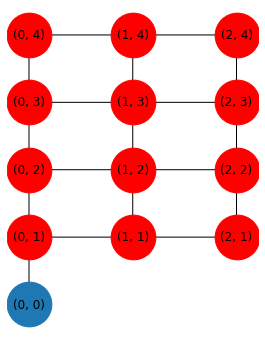

In [5]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

In [6]:
all_states_1142 = abg.markov.build_states(threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)
Q_sym_1142 = abg.markov.get_symbolic_transition_matrix(num_of_servers=num_of_servers, threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity)

p00, p01, p11, p21, p02, p12, p22, p03, p13, p23, p04, p14, p24 = sym.symbols('p00, p01, p11, p21, p02, p12, p22, p03, p13, p23, p04, p14, p24')
pi_1142 = sym.Matrix([p00, p01, p11, p21, p02, p12, p22, p03, p13, p23, p04, p14, p24])
dimension_1142 = Q_sym_1142.shape[0]

M_sym_1142 = sym.Matrix([Q_sym_1142.transpose()[:-1,:], sym.ones(1,dimension_1142)])
sym_diff_equations_1142 = (M_sym_1142 @ pi_1142)

b_sym_1142 = sym.Matrix([sym.zeros(dimension_1142 - 1, 1), [1]])

In [7]:
eq0_1142 = sym.Eq(sym_diff_equations_1142[0],b_sym_1142[0])
eq1_1142 = sym.Eq(sym_diff_equations_1142[1],b_sym_1142[1])
eq2_1142 = sym.Eq(sym_diff_equations_1142[2],b_sym_1142[2])
eq3_1142 = sym.Eq(sym_diff_equations_1142[3],b_sym_1142[3])
eq4_1142 = sym.Eq(sym_diff_equations_1142[4],b_sym_1142[4])
eq5_1142 = sym.Eq(sym_diff_equations_1142[5],b_sym_1142[5])
eq6_1142 = sym.Eq(sym_diff_equations_1142[6],b_sym_1142[6])
eq7_1142 = sym.Eq(sym_diff_equations_1142[7],b_sym_1142[7])
eq8_1142 = sym.Eq(sym_diff_equations_1142[8],b_sym_1142[8])
eq9_1142 = sym.Eq(sym_diff_equations_1142[9],b_sym_1142[9])
eq10_1142 = sym.Eq(sym_diff_equations_1142[10],b_sym_1142[10])
eq11_1142 = sym.Eq(sym_diff_equations_1142[11],b_sym_1142[11])
eq12_1142 = sym.Eq(sym_diff_equations_1142[12],b_sym_1142[12])

In [8]:
sym_state_probs_1142 = sym.solve([eq0_1142,eq1_1142,eq2_1142,eq3_1142,eq4_1142,eq5_1142,eq6_1142,eq7_1142,eq8_1142,eq9_1142,eq10_1142,eq11_1142,eq12_1142],(p00, p01, p11, p21, p02, p12, p22, p03, p13, p23, p04, p14, p24))

In [16]:
sym_state_recursive_ratios_1142 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_1142[0,0] = 1
sym_state_recursive_ratios_1142[0,1] = sym.factor(sym_state_probs_1142[p01] / sym_state_probs_1142[p00])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_1142[1,1] = sym.factor(sym_state_probs_1142[p11] / sym_state_probs_1142[p01])  # (0,1) -> (1,1)
sym_state_recursive_ratios_1142[2,1] = sym.factor(sym_state_probs_1142[p21] / sym_state_probs_1142[p11])  # (1,1) -> (2,1)
sym_state_recursive_ratios_1142[0,2] = sym.factor(sym_state_probs_1142[p02] / sym_state_probs_1142[p01])  # (0,1) -> (0,2)
sym_state_recursive_ratios_1142[1,2] = sym.factor(sym_state_probs_1142[p12] / sym_state_probs_1142[p02])  # (0,2) -> (1,2)
sym_state_recursive_ratios_1142[2,2] = sym.factor(sym_state_probs_1142[p22] / sym_state_probs_1142[p12])  # (1,2) -> (2,2)
sym_state_recursive_ratios_1142[0,3] = sym.factor(sym_state_probs_1142[p03] / sym_state_probs_1142[p02])  # (0,2) -> (0,3)
sym_state_recursive_ratios_1142[1,3] = sym.factor(sym_state_probs_1142[p13] / sym_state_probs_1142[p03])  # (0,3) -> (1,3)
sym_state_recursive_ratios_1142[2,3] = sym.factor(sym_state_probs_1142[p23] / sym_state_probs_1142[p13])  # (1,3) -> (2,3)
sym_state_recursive_ratios_1142[0,4] = sym.factor(sym_state_probs_1142[p04] / sym_state_probs_1142[p03])  # (0,3) -> (0,4)
sym_state_recursive_ratios_1142[1,4] = sym.factor(sym_state_probs_1142[p14] / sym_state_probs_1142[p04])  # (0,4) -> (1,4)
sym_state_recursive_ratios_1142[2,4] = sym.factor(sym_state_probs_1142[p24] / sym_state_probs_1142[p14])  # (1,4) -> (2,4)

sym_state_recursive_ratios_right_1142 = sym_state_recursive_ratios_1142.copy()
sym_state_recursive_ratios_right_1142[1,2] = sym.factor(sym_state_probs_1142[p12] / sym_state_probs_1142[p11])  # (1,1) -> (1,2)
sym_state_recursive_ratios_right_1142[1,3] = sym.factor(sym_state_probs_1142[p13] / sym_state_probs_1142[p12])  # (1,2) -> (1,3)
sym_state_recursive_ratios_right_1142[1,4] = sym.factor(sym_state_probs_1142[p14] / sym_state_probs_1142[p13])  # (1,3) -> (1,4)
sym_state_recursive_ratios_right_1142[2,2] = sym.factor(sym_state_probs_1142[p22] / sym_state_probs_1142[p21])  # (2,1) -> (2,2)
sym_state_recursive_ratios_right_1142[2,3] = sym.factor(sym_state_probs_1142[p23] / sym_state_probs_1142[p22])  # (2,2) -> (2,3)
sym_state_recursive_ratios_right_1142[2,4] = sym.factor(sym_state_probs_1142[p24] / sym_state_probs_1142[p23])  # (2,3) -> (2,4)

sym_state_recursive_ratios_P0_1142 = sym.zeros(buffer_capacity + 1, system_capacity + 1)
sym_state_recursive_ratios_P0_1142[0,0] = 1
sym_state_recursive_ratios_P0_1142[0,1] = sym.factor(sym_state_probs_1142[p01] / sym_state_probs_1142[p00])  # (0,0) -> (0,1) 
sym_state_recursive_ratios_P0_1142[1,1] = sym.factor(sym_state_probs_1142[p11] / sym_state_probs_1142[p00])  # (0,0) -> (1,1)
sym_state_recursive_ratios_P0_1142[2,1] = sym.factor(sym_state_probs_1142[p21] / sym_state_probs_1142[p00])  # (0,0) -> (2,1)

sym_state_recursive_ratios_P0_1142[0,2] = sym.factor(sym_state_probs_1142[p02] / sym_state_probs_1142[p00])  # (0,0) -> (0,2)
sym_state_recursive_ratios_P0_1142[1,2] = sym.factor(sym_state_probs_1142[p12] / sym_state_probs_1142[p00])  # (0,0) -> (1,2)
sym_state_recursive_ratios_P0_1142[2,2] = sym.factor(sym_state_probs_1142[p22] / sym_state_probs_1142[p00])  # (0,0) -> (2,2)

sym_state_recursive_ratios_P0_1142[0,3] = sym.factor(sym_state_probs_1142[p03] / sym_state_probs_1142[p00])  # (0,0) -> (0,3)
sym_state_recursive_ratios_P0_1142[1,3] = sym.factor(sym_state_probs_1142[p13] / sym_state_probs_1142[p00])  # (0,0) -> (1,3)
sym_state_recursive_ratios_P0_1142[2,3] = sym.factor(sym_state_probs_1142[p23] / sym_state_probs_1142[p00])  # (0,0) -> (2,3)

sym_state_recursive_ratios_P0_1142[0,4] = sym.factor(sym_state_probs_1142[p04] / sym_state_probs_1142[p00])  # (0,0) -> (0,4)
sym_state_recursive_ratios_P0_1142[1,4] = sym.factor(sym_state_probs_1142[p14] / sym_state_probs_1142[p00])  # (0,0) -> (1,4)
sym_state_recursive_ratios_P0_1142[2,4] = sym.factor(sym_state_probs_1142[p24] / sym_state_probs_1142[p00])  # (0,0) -> (2,4)


In [17]:
sym_state_recursive_ratios_1142

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Lambda/mu,                                        

In [18]:
sym_state_recursive_ratios_right_1142

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Lambda/mu,                                        

In [19]:
sym_state_recursive_ratios_P0_1142

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Lambda/mu,                                                                                                                             

# Recursive Ratios

## $C=1, T=2, N=2, M=2$

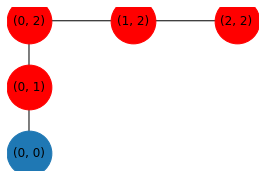

In [2]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=2, system_capacity=2, buffer_capacity=2)

In [44]:
sym_state_recursive_ratios_1222

⎡   Λ   Λ  ⎤
⎢1  ─   ─  ⎥
⎢   μ   μ  ⎥
⎢          ⎥
⎢      λ__A⎥
⎢0  0  ────⎥
⎢       μ  ⎥
⎢          ⎥
⎢      λ__A⎥
⎢0  0  ────⎥
⎣       μ  ⎦

## $C=1, T=1, N=2, M=1$

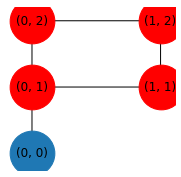

In [3]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=1, system_capacity=2, buffer_capacity=1)

In [45]:
sym_state_recursive_ratios_1121, sym_state_recursive_ratios_right_1121

⎛⎡             Λ                       λ__o          ⎤                        
⎜⎢1            ─                     ────────        ⎥  ⎡             Λ       
⎜⎢             μ                     λ__A + μ        ⎥  ⎢1            ─       
⎜⎢                                                   ⎥  ⎢             μ       
⎜⎢   λ__A⋅(λ__A + λ__o + μ)  λ__A⋅(λ__A + λ__o + 2⋅μ)⎥, ⎢                     
⎜⎢0  ──────────────────────  ────────────────────────⎥  ⎢   λ__A⋅(λ__A + λ__o 
⎜⎢        μ⋅(λ__A + μ)                   2           ⎥  ⎢0  ──────────────────
⎝⎣                                      μ            ⎦  ⎣        μ⋅(λ__A + μ) 

                               ⎞
                λ__o          ⎤⎟
              ────────        ⎥⎟
              λ__A + μ        ⎥⎟
                              ⎥⎟
+ μ)  λ__o⋅(λ__A + λ__o + 2⋅μ)⎥⎟
────  ────────────────────────⎥⎟
        μ⋅(λ__A + λ__o + μ)   ⎦⎠

## $C=1, T=3, N=4, M=1$

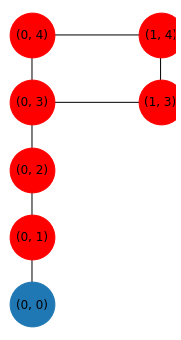

In [4]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=3, system_capacity=4, buffer_capacity=1)

In [46]:
sym_state_recursive_ratios_1341, sym_state_recursive_ratios_right_1341

⎛⎡   Λ  Λ            Λ                       λ__o          ⎤                  
⎜⎢1  ─  ─            ─                     ────────        ⎥  ⎡   Λ  Λ        
⎜⎢   μ  μ            μ                     λ__A + μ        ⎥  ⎢1  ─  ─        
⎜⎢                                                         ⎥  ⎢   μ  μ        
⎜⎢         λ__A⋅(λ__A + λ__o + μ)  λ__A⋅(λ__A + λ__o + 2⋅μ)⎥, ⎢               
⎜⎢0  0  0  ──────────────────────  ────────────────────────⎥  ⎢         λ__A⋅(
⎜⎢              μ⋅(λ__A + μ)                   2           ⎥  ⎢0  0  0  ──────
⎝⎣                                            μ            ⎦  ⎣              μ

                                           ⎞
    Λ                       λ__o          ⎤⎟
    ─                     ────────        ⎥⎟
    μ                     λ__A + μ        ⎥⎟
                                          ⎥⎟
λ__A + λ__o + μ)  λ__o⋅(λ__A + λ__o + 2⋅μ)⎥⎟
────────────────  ────────────────────────⎥⎟
⋅(λ__A + μ)         μ⋅(λ__A + λ__o + μ)   ⎦⎠

## $C=1, T=1, N=2, M=2$

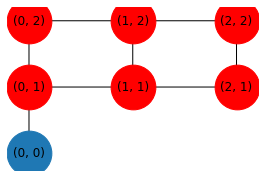

In [5]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=1, system_capacity=2, buffer_capacity=2)

In [47]:
sym_state_recursive_ratios_1122, sym_state_recursive_ratios_right_1122

⎛⎡                                 Λ                                          
⎜⎢1                                ─                                          
⎜⎢                                 μ                                          
⎜⎢                                                                            
⎜⎢                      λ__A⋅(λ__A + λ__o + μ)                                
⎜⎢0                     ──────────────────────                                
⎜⎢                           μ⋅(λ__A + μ)                                     
⎜⎢                                                                            
⎜⎢        ⎛    2                                2               2⎞       ⎛    
⎜⎢   λ__A⋅⎝λ__A  + 2⋅λ__A⋅λ__o + 2⋅λ__A⋅μ + λ__o  + 3⋅λ__o⋅μ + μ ⎠  λ__A⋅⎝λ__A
⎜⎢0  ─────────────────────────────────────────────────────────────  ──────────
⎜⎢                   μ⋅(λ__A + μ)⋅(λ__A + λ__o + μ)                           
⎝⎣                                                  

## $C=1, T=1, N=3, M=1$

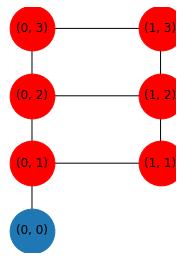

In [15]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=1, system_capacity=3, buffer_capacity=1)

In [48]:
sym_state_recursive_ratios_1131

⎡                                Λ                                            
⎢1                               ─                                            
⎢                                μ                                            
⎢                                                                             
⎢                                                                             
⎢        ⎛    2                                2             2⎞       ⎛    2  
⎢   λ__A⋅⎝λ__A  + 2⋅λ__A⋅λ__o + 2⋅λ__A⋅μ + λ__o  + λ__o⋅μ + μ ⎠  λ__A⋅⎝λ__A  +
⎢0  ───────────────────────────────────────────────────────────  ─────────────
⎢                ⎛    2                           2⎞                          
⎣              μ⋅⎝λ__A  + λ__A⋅λ__o + 2⋅λ__A⋅μ + μ ⎠                          

           λ__o⋅(λ__A + μ)                                                    
  ─────────────────────────────────                                           
      2                           2                

In [49]:
sym_state_recursive_ratios_right_1131

⎡                                Λ                                            
⎢1                               ─                                            
⎢                                μ                                            
⎢                                                                             
⎢                                                                             
⎢        ⎛    2                                2             2⎞       ⎛    2  
⎢   λ__A⋅⎝λ__A  + 2⋅λ__A⋅λ__o + 2⋅λ__A⋅μ + λ__o  + λ__o⋅μ + μ ⎠  λ__o⋅⎝λ__A  +
⎢0  ───────────────────────────────────────────────────────────  ─────────────
⎢                ⎛    2                           2⎞                   ⎛    2 
⎣              μ⋅⎝λ__A  + λ__A⋅λ__o + 2⋅λ__A⋅μ + μ ⎠                 μ⋅⎝λ__A  

           λ__o⋅(λ__A + μ)                                                    
  ─────────────────────────────────                                           
      2                           2                

## $C=1, T=1, N=3, M=2$

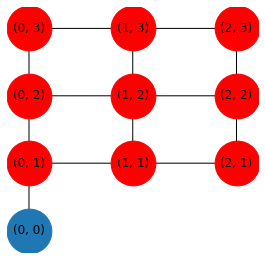

In [17]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=1, system_capacity=3, buffer_capacity=2)

In [12]:
sym_state_recursive_ratios_1132

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Lambda/mu,                                                                                                                                                                                                                                                                                                                                                                                                                                              lambda_1*(lambda_2 + mu)/(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + 

In [13]:
sym_state_recursive_ratios_right_1132

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Lambda/mu,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## $C=1, T=1, N=4, M=1$

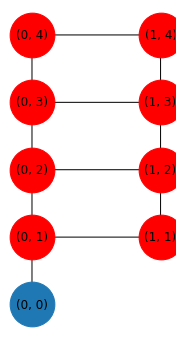

In [18]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=1, system_capacity=4, buffer_capacity=1)

In [33]:
sym_state_recursive_ratios_1141

Matrix([
[1,                                                                                                                                                                                                                                               Lambda/mu,                                                                 lambda_1*(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2)/(lambda_2**3 + 2*lambda_2**2*lambda_1 + 3*lambda_2**2*mu + lambda_2*lambda_1**2 + 2*lambda_2*lambda_1*mu + 3*lambda_2*mu**2 + mu**3),                                                                                                                                            lambda_1*(lambda_2 + mu)/(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2),                                                                                                                                                                                    lambda_1/(lambda_2 + mu)],
[0, lambda_2*(lambda_2 + lambda_1 + mu)*(lam

In [34]:
sym_state_recursive_ratios_right_1141

Matrix([
[1,                                                                                                                                                                                                                                               Lambda/mu,                                                                                                         lambda_1*(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2)/(lambda_2**3 + 2*lambda_2**2*lambda_1 + 3*lambda_2**2*mu + lambda_2*lambda_1**2 + 2*lambda_2*lambda_1*mu + 3*lambda_2*mu**2 + mu**3),                                                                                                                                                                                                                                                                                                                      lambda_1*(lambda_2 + mu)/(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2),                                         

## $C=1, T=1, N=4, M=2$

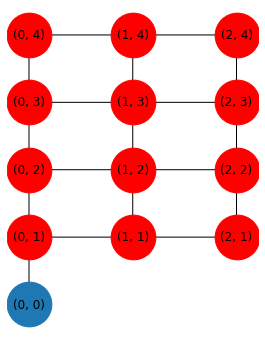

In [19]:
abg.markov.visualise_ambulance_markov_chain(num_of_servers=1, threshold=1, system_capacity=4, buffer_capacity=2)

In [20]:
sym_state_recursive_ratios_1142

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Lambda/mu,                                        

In [21]:
sym_state_recursive_ratios_right_1142

Matrix([
[1,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Lambda/mu,                                        

# $P_0$ rate

## $C=1, T=2, N=2, M=2$

In [63]:
sym.factor(sym.fraction(sym_state_probs_1222[0])[0])

 4
μ 

## $C=1, T=1, N=2, M=1$

In [64]:
sym.factor(sym.fraction(sym_state_probs_1121[0])[0])

 3           
μ ⋅(λ__A + μ)

## $C=1, T=3, N=4, M=1$

In [65]:
sym.factor(sym.fraction(sym_state_probs_1341[0])[0])

 5           
μ ⋅(λ__A + μ)

## $C=1, T=1, N=2, M=2$

In [66]:
sym.factor(sym.fraction(sym_state_probs_1122[0])[0])

 4           2
μ ⋅(λ__A + μ) 

## $C=1, T=1, N=3, M=1$

In [61]:
sym.factor(sym.fraction(sym_state_probs_1131[0])[0])

 4 ⎛    2                           2⎞
μ ⋅⎝λ__A  + λ__A⋅λ__o + 2⋅λ__A⋅μ + μ ⎠

## $C=1, T=1, N=3, M=2$

In [15]:
sym.factor(sym.fraction(sym_state_probs_1132[p00])[0])

mu**5*(lambda_2**2 + lambda_2*lambda_1 + 2*lambda_2*mu + mu**2)**2

## $C=1, T=1, N=4, M=1$

In [41]:
sym.factor(sym.fraction(sym_state_probs_1141[p00])[0])

mu**5*(lambda_2**3 + 2*lambda_2**2*lambda_1 + 3*lambda_2**2*mu + lambda_2*lambda_1**2 + 2*lambda_2*lambda_1*mu + 3*lambda_2*mu**2 + mu**3)

## $C=1, T=1, N=4, M=2$

In [22]:
sym.factor(sym.fraction(sym_state_probs_1142[p00])[0])

mu**6*(lambda_2**3 + 2*lambda_2**2*lambda_1 + 3*lambda_2**2*mu + lambda_2*lambda_1**2 + 2*lambda_2*lambda_1*mu + 3*lambda_2*mu**2 + mu**3)**2